In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! pip3 install fpdf


Defaulting to user installation because normal site-packages is not writeable


In [3]:
df =pd.read_csv("day 30 customer_acquisition_data.csv")

In [4]:
df

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [5]:
#understand the data
df.head(5)

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [6]:
df.tail(5)

,customer_id,channel,cost,conversion_rate,revenue
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813
799,800,email marketing,5.246263,0.043822,4820


In [7]:
#summerize the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [8]:
#descriptive statistics
df.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


In [9]:
#accssing specific columns with unique values
df['channel']

0              referral
1      paid advertising
2       email marketing
3          social media
4              referral
             ...       
795        social media
796     email marketing
797        social media
798    paid advertising
799     email marketing
Name: channel, Length: 800, dtype: object

In [10]:
df[['channel','revenue']]

,channel,revenue
0,referral,4199
1,paid advertising,3410
2,email marketing,3164
3,social media,1520
4,referral,2419
...,...,...
795,social media,2813
796,email marketing,3439
797,social media,2101
798,paid advertising,813


In [11]:
#hendling missing values
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [12]:
#AGGregate functions with groupby
df.groupby('channel')['revenue'].mean()

channel
email marketing     2825.728972
paid advertising    2826.783505
referral            2751.458937
social media        2663.064865
Name: revenue, dtype: float64

In [13]:
df.groupby('channel')['revenue'].sum()

channel
email marketing     604706
paid advertising    548396
referral            569552
social media        492667
Name: revenue, dtype: int64

In [14]:
df.groupby('channel')['cost'].sum()

channel
email marketing     1122.700340
paid advertising    5907.363479
referral            1722.307634
social media        1766.070249
Name: cost, dtype: float64

In [15]:
df.groupby('channel')['revenue'].max()

channel
email marketing     4956
paid advertising    4998
referral            4994
social media        4932
Name: revenue, dtype: int64

In [16]:
#accending order
df.sort_values(by='revenue', ascending=True)

,customer_id,channel,cost,conversion_rate,revenue
336,337,referral,8.320327,0.123145,500
639,640,email marketing,5.246263,0.043822,500
459,460,paid advertising,30.450327,0.016341,510
720,721,email marketing,5.246263,0.043822,513
463,464,referral,8.320327,0.123145,516
...,...,...,...,...,...
431,432,referral,8.320327,0.123145,4954
334,335,email marketing,5.246263,0.043822,4956
253,254,referral,8.320327,0.123145,4994
406,407,paid advertising,30.450327,0.016341,4998


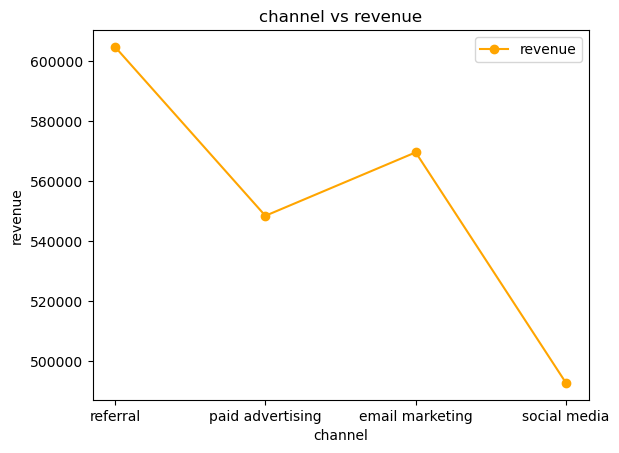

In [19]:
#high revenue with channel
plt.plot(df['channel'].unique(),df.groupby('channel')['revenue'].sum(),color='orange', marker='o', linestyle='-',label='revenue')
plt.xlabel('channel')       
plt.ylabel('revenue')
plt.title('channel vs revenue')

plt.legend()
plt.show()

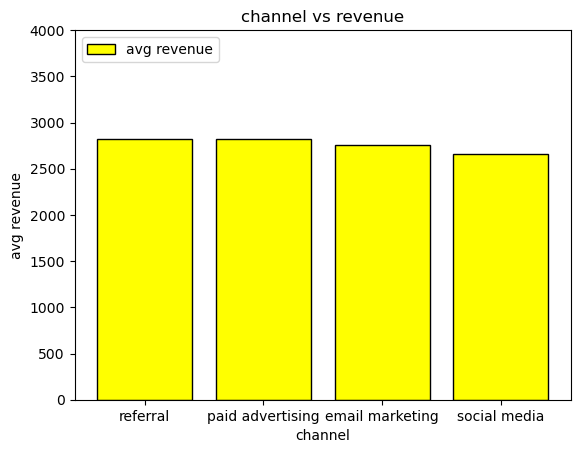

In [17]:
#highest revenue with channel
plt.bar(df['channel'].unique(),df.groupby('channel')['revenue'].mean(),color ='yellow',edgecolor= 'black',label='avg revenue')
plt.xlabel('channel')       
plt.ylabel('avg revenue')
plt.title('channel vs revenue')
plt.ylim(0,4000)
plt.legend(loc ='upper left')
plt.show()

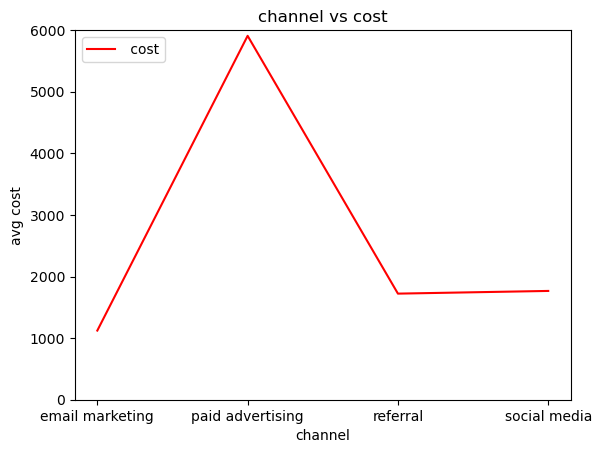

In [21]:
#high costly channels
plt.plot(df.groupby('channel')['cost'].sum(),color='red', label=' cost')
plt.xlabel('channel')               
plt.ylabel('avg cost')
plt.title('channel vs cost')        
plt.ylim(0,6000)
plt.legend(loc ='upper left')

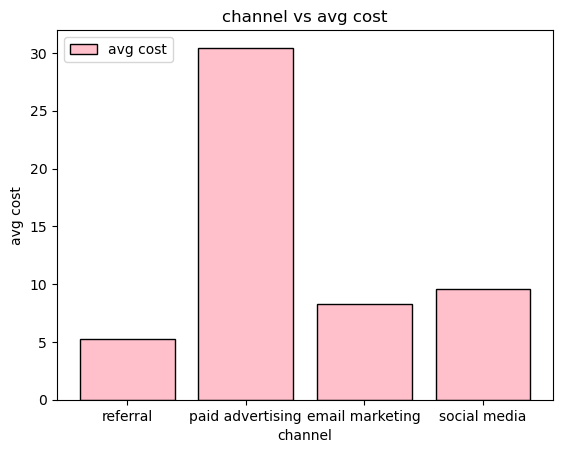

In [18]:
#avg cost with channel
plt.bar(df['channel'].unique(),df.groupby('channel')['cost'].mean(),color='pink',edgecolor='black',label='avg cost')
plt.xlabel('channel')                                                                                                                   
plt.ylabel('avg cost')  
plt.title('channel vs avg cost')   
plt.legend(loc='upper left')


Text(0.5, 1.0, 'Revenue Distribution by Channel')

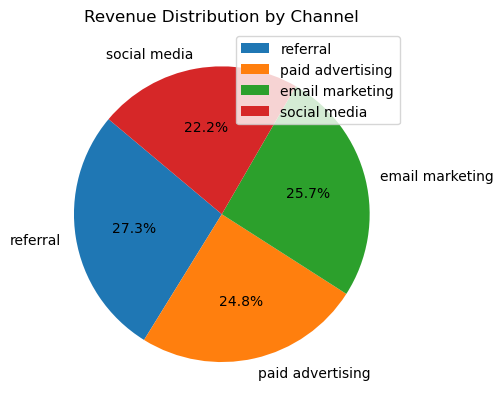

In [24]:
#pie chart
#highest revenue distribution with channel
channels = df['channel'].unique()
revenue = df.groupby('channel')['revenue'].sum()    
plt.pie(revenue, labels=channels, autopct='%1.1f%%', startangle=140)
plt.legend(loc='upper right')

plt.title('Revenue Distribution by Channel')    

Text(0.5, 1.0, 'Distribution of Conversion Rates')

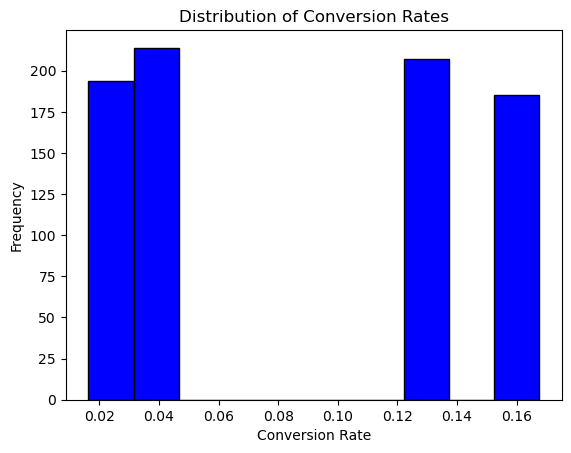

In [19]:
#histogram
plt.hist(df['conversion_rate'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Conversion Rates')


In [20]:
#calculate ROI
#netprofit = revenue - cost
#ROI = (netprofit / cost) * 100
profit = df['revenue'] - df['cost']
df['ROI'] = profit / df['cost'] * 100
df[['channel', 'cost', 'revenue', 'ROI']]

,channel,cost,revenue,ROI
0,referral,8.320327,4199,50366.768135
1,paid advertising,30.450327,3410,11098.566032
2,email marketing,5.246263,3164,60209.592493
3,social media,9.546326,1520,15822.356443
4,referral,8.320327,2419,28973.377499
...,...,...,...,...
795,social media,9.546326,2813,29366.834654
796,email marketing,5.246263,3439,65451.418642
797,social media,9.546326,2101,21908.467688
798,paid advertising,30.450327,813,2569.922048


Text(0, 0.5, 'Average ROI (%)')

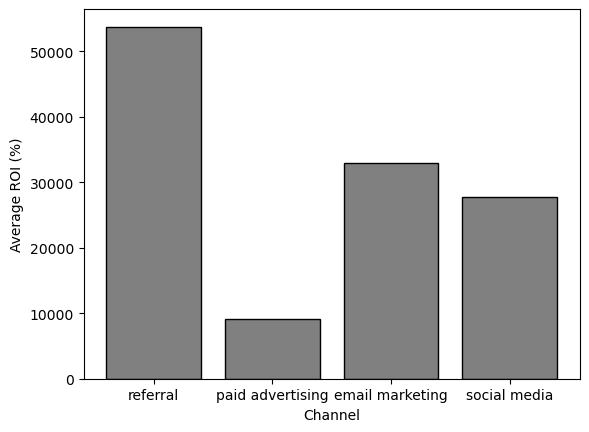

In [21]:
#return on investment with channel
plt.bar(df['channel'].unique(), df.groupby('channel')['ROI'].mean(), color='gray', edgecolor='black', label='Avg ROI')
plt.xlabel('Channel')
plt.ylabel('Average ROI (%)')

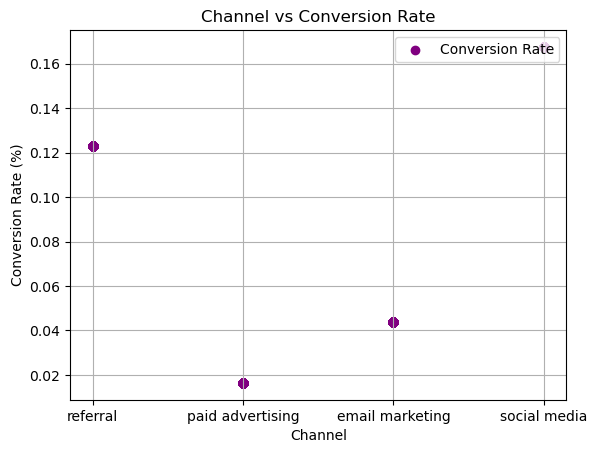

In [56]:
#customers with high conversion rate
plt.scatter(df['channel'], df['conversion_rate'], color='purple',marker='o', label='Conversion Rate')
plt.legend(loc='upper right')
plt.xlabel('Channel')   
plt.ylabel('Conversion Rate (%)')
plt.title('Channel vs Conversion Rate')
plt.grid(True)
plt.show()

In [39]:
df

,customer_id,channel,cost,conversion_rate,revenue,ROI
0,1,referral,8.320327,0.123145,4199,50366.768135
1,2,paid advertising,30.450327,0.016341,3410,11098.566032
2,3,email marketing,5.246263,0.043822,3164,60209.592493
3,4,social media,9.546326,0.167592,1520,15822.356443
4,5,referral,8.320327,0.123145,2419,28973.377499
...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,29366.834654
796,797,email marketing,5.246263,0.043822,3439,65451.418642
797,798,social media,9.546326,0.167592,2101,21908.467688
798,799,paid advertising,30.450327,0.016341,813,2569.922048


In [40]:
#number of customer
df['customer_id'].count()


800

In [31]:
df

,customer_id,channel,cost,conversion_rate,revenue,ROI
0,1,referral,8.320327,0.123145,4199,50366.768135
1,2,paid advertising,30.450327,0.016341,3410,11098.566032
2,3,email marketing,5.246263,0.043822,3164,60209.592493
3,4,social media,9.546326,0.167592,1520,15822.356443
4,5,referral,8.320327,0.123145,2419,28973.377499
...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,29366.834654
796,797,email marketing,5.246263,0.043822,3439,65451.418642
797,798,social media,9.546326,0.167592,2101,21908.467688
798,799,paid advertising,30.450327,0.016341,813,2569.922048


In [25]:
base_date =pd.to_datetime('2001-01-1')
df['First_parchase_date']=[base_date+pd.Timedelta(days=i) for i in range(len(df))]
df['last_purchase_date'] =pd.to_datetime('2025-09-30')



In [26]:
df['customer_lifetime_days'] =(df['last_purchase_date']-df['First_parchase_date'])

In [91]:
df

,customer_id,channel,cost,conversion_rate,revenue,ROI,First_parchase_date,last_purchase_date,customer_lifetime_days
0,1,referral,8.320327,0.123145,4199,50366.768135,2001-01-01,2025-09-30,9038 days
1,2,paid advertising,30.450327,0.016341,3410,11098.566032,2001-01-02,2025-09-30,9037 days
2,3,email marketing,5.246263,0.043822,3164,60209.592493,2001-01-03,2025-09-30,9036 days
3,4,social media,9.546326,0.167592,1520,15822.356443,2001-01-04,2025-09-30,9035 days
4,5,referral,8.320327,0.123145,2419,28973.377499,2001-01-05,2025-09-30,9034 days
...,...,...,...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,29366.834654,2003-03-07,2025-09-30,8243 days
796,797,email marketing,5.246263,0.043822,3439,65451.418642,2003-03-08,2025-09-30,8242 days
797,798,social media,9.546326,0.167592,2101,21908.467688,2003-03-09,2025-09-30,8241 days
798,799,paid advertising,30.450327,0.016341,813,2569.922048,2003-03-10,2025-09-30,8240 days


Text(0.5, 1.0, 'Channel vs Customer Lifetime Days')

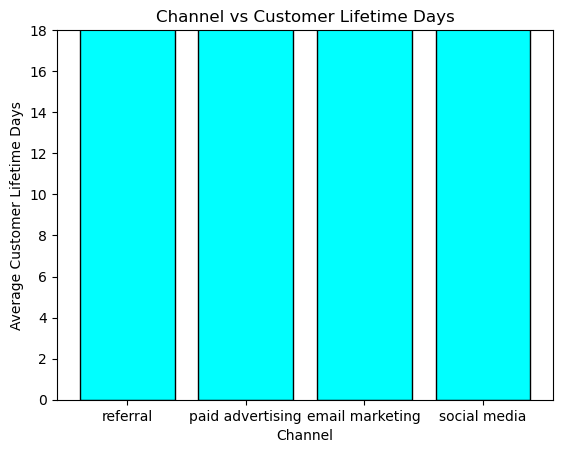

In [38]:
#customers_lifetime_days with channel
plt.bar(df['channel'].unique(), df.groupby('channel')['customer_lifetime_days'].mean(), color='cyan', edgecolor='black', label='Avg Customer Lifetime Days')
plt.xlabel('Channel')  
plt.ylim(0,18)
plt.ylabel('Average Customer Lifetime Days')
plt.title('Channel vs Customer Lifetime Days')

Text(0.5, 1.0, 'Channel vs Number of Customers')

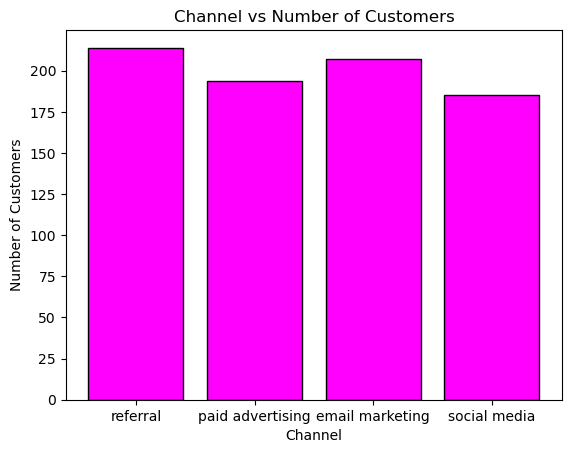

In [39]:
#number of customer with channel
plt.bar(df['channel'].unique(), df.groupby('channel')['customer_id'].count(), color='magenta', edgecolor='black', label='Number of Customers')
plt.xlabel('Channel')       
plt.ylabel('Number of Customers')
plt.title('Channel vs Number of Customers')

C:\Users\hp5cd\AppData\Local\Temp\ipykernel_416\2097864215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\hp5cd\AppData\Local\Temp\ipykernel_416\2097864215.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


Text(0.5, 1.0, 'Correlation Matrix')

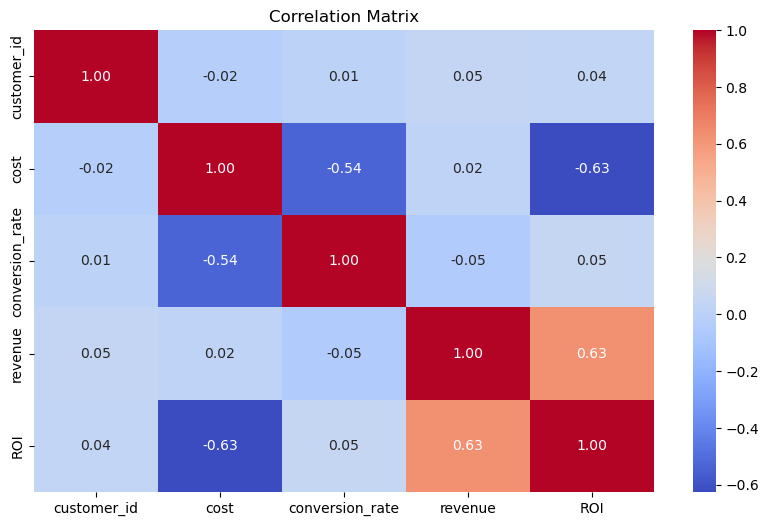

In [40]:
#correlation matrix
df.corr()
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

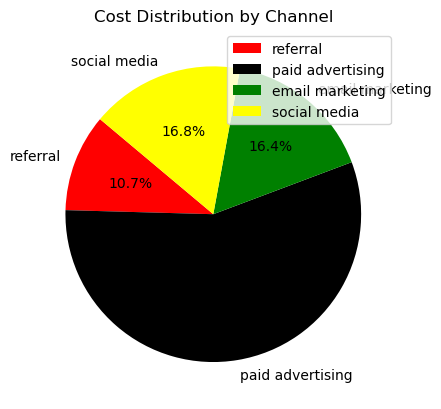

In [51]:
plt.pie(df.groupby('channel')['cost'].sum(), labels=df['channel'].unique(), colors=['red','black','green','yellow'],autopct='%1.1f%%', startangle=140)
plt.title('Cost Distribution by Channel')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Cost vs Revenue')

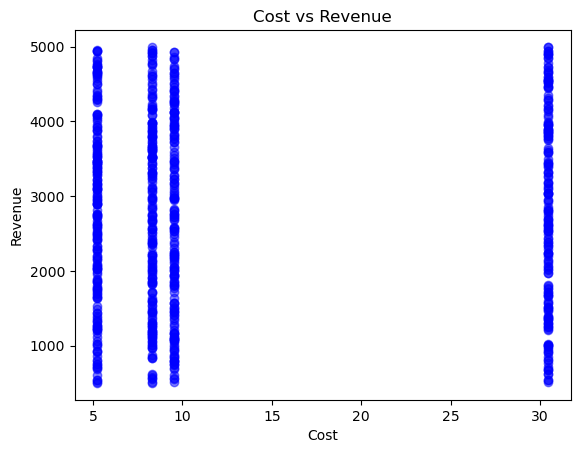

In [52]:
#scatter plot
plt.scatter(df['cost'], df['revenue'], color='blue', alpha=0.5)
plt.xlabel('Cost')      
plt.ylabel('Revenue')
plt.title('Cost vs Revenue')

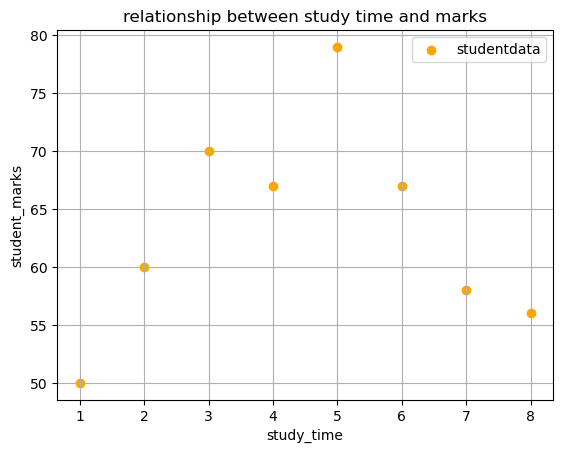

In [55]:
#scatter
study_hours =[1,2,3,4,5,6,7,8]
student_marks=[50,60,70,67,79,67,58,56]
plt.scatter(study_hours,student_marks,color ='orange',marker='o',label='studentdata')
plt.title('relationship between study time and marks')
plt.xlabel('study_time')
plt.ylabel('student_marks')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()